*Created by Petteri Nevavuori <<petteri.nevavuori@gmail.com>>.*

---

# II. Building a General Purpose Cryptocurrency

In this notebook we will go through building a general purpose Cryptocurrency. We will reuse parts of code from the previous notebook *Building a General Purpose Blockchain* and develop those ideas further. This notebook is a bit different from the first as there will be some related notes written down for easier grasping of the concept of cryptocurrency.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction-to-the-Concept-of-Cryptocurrency" data-toc-modified-id="1.-Introduction-to-the-Concept-of-Cryptocurrency-1">1. Introduction to the Concept of Cryptocurrency</a></span><ul class="toc-item"><li><span><a href="#1.1-Background" data-toc-modified-id="1.1-Background-1.1">1.1 Background</a></span></li><li><span><a href="#1.2-The-Difficulty-of-Mining" data-toc-modified-id="1.2-The-Difficulty-of-Mining-1.2">1.2 The Difficulty of Mining</a></span><ul class="toc-item"><li><span><a href="#1.2.1-Calculating-the-Hash" data-toc-modified-id="1.2.1-Calculating-the-Hash-1.2.1">1.2.1 Calculating the Hash</a></span></li></ul></li><li><span><a href="#1.3-Mining-Pools" data-toc-modified-id="1.3-Mining-Pools-1.3">1.3 Mining Pools</a></span></li><li><span><a href="#1.4-Mempools" data-toc-modified-id="1.4-Mempools-1.4">1.4 Mempools</a></span></li><li><span><a href="#1.5-Transactions" data-toc-modified-id="1.5-Transactions-1.5">1.5 Transactions</a></span><ul class="toc-item"><li><span><a href="#Transaction-fees" data-toc-modified-id="Transaction-fees-1.5.1">Transaction fees</a></span></li><li><span><a href="#Wallets" data-toc-modified-id="Wallets-1.5.2">Wallets</a></span></li></ul></li></ul></li><li><span><a href="#2.-Building-the-Cryptocurrency" data-toc-modified-id="2.-Building-the-Cryptocurrency-2">2. Building the Cryptocurrency</a></span><ul class="toc-item"><li><span><a href="#2.1-Testing-the-Implementation" data-toc-modified-id="2.1-Testing-the-Implementation-2.1">2.1 Testing the Implementation</a></span></li><li><span><a href="#2.2-Expanding-the-Blockchain" data-toc-modified-id="2.2-Expanding-the-Blockchain-2.2">2.2 Expanding the Blockchain</a></span></li></ul></li><li><span><a href="#3.-Creating-the-Web-App" data-toc-modified-id="3.-Creating-the-Web-App-3">3. Creating the Web App</a></span></li></ul></div>

## 1. Introduction to the Concept of Cryptocurrency

Cryptocurrencies constitute of three distinct layers: the technology, the protocol and the token layer. Cryptocurrencies are in themselves just de-centralized distributed ledgers with network-wide consensus mechanisms for the validation of chains. The distinctions are in the protocols and tokens issued to the users. 

- **Technology**: The already handled Blockchain is essentially the key technology serving as the foundation of the cryptocurrencies.


- **Protocol**: A [protocol](https://en.wikipedia.org/wiki/Communication_protocol) is a definition of the channels and rules of communication. While cryptocurrencies aer usually seen as only being a form of a volatile virtual currency, essentially every coin defines a set of rules and channels with and through which the users communicate, i.e. a protocol. In the context of distributed ledgers the protocol defines for example how the consensus of validity is achieved or how the authentication process operates.

 The distinct coins of the cryptocurrencies are intimately linked to the distinct protocols and enforce the user compliance towards a cryptocurrencies set of rules and channels of communication. Thus the protocol itself is a distinct platform on top of which a multitude of token-based systems can be built upon (e.g. ).


- **Token**: Token is the basis of smart contracts. The initial coin offerings (ICOs) are actually not usually about the *coins*, but the *tokens* for a token-based system *built upon a coin protocol*, such as [Ethereum](https://www.ethereum.org/), [Waves](https://wavesplatform.com/) or [Neo](https://neo.org/). [Bitcoin](https://bitcoin.org/en/) for one can't be used with tokens, as the protocol does not enforce the idea of them, much like [Ripple](https://ripple.com/).  

### 1.1 Background

The use of Blockchain as the foundational technology thus allows users to perform transactions without intermediaries. Normally an intermediary used in the transaction process acts fundamentally as a source of mutual trust between any two users. In distributed consensus networks the source of trust has been transferred to the underlying technology.

The starting point for cryptocurrencies can be timed to the release of a white paper by Satoshi Nakamoto called Bitcoin: A Peer-to-Peer Electronic Cash System (2008). In the introduction the stressing point is to have a trust system not based on institutional intermediaries. In the article the basic blueprint for a cryptocurrency is given as follows:

> *What is needed is an electronic payment system based on cryptographic proof instead of trust, allowing any two willing parties to transact directly with each other without the need for a trusted third  party.    Transactions  that  are  computationally  impractical  to   reverse   would  protect  sellers from fraud, and routine escrow mechanisms could easily be implemented to protect buyers.   In this paper, we propose a solution to the double-spending problem using a peer-to-peer distributed timestamp server to generate computational proof of the chronological order of transactions.  The system   is   secure   as   long   as   honest   nodes   collectively   control   more   CPU   power   than   any cooperating group of attacker nodes.*

The last point has to do with the Byzantine Fault Tolerance, which can be read more about from a paper by Lamport et al. called The Byzantine Generals Problem (1982) or an [article](https://medium.com/loom-network/understanding-blockchain-fundamentals-part-1-byzantine-fault-tolerance-245f46fe8419) by G. Konstantopoulos. The basic idea is that every command by a general should be validated by the receiving officers between each other. While some officers might distort the original command, the majority is believed to relay the general's command unchanged. Every officer should therefore act on the command with a majority of validations behind it. This is the concept behind the notion of controlling more CPU power.

### 1.2 The Difficulty of Mining

The solving of the cryptographic puzzle is an artificial means of making the mining of new Blocks and thus receiving associated tokens as rewards harder. The key element in making the mining harder is the issuence of **a target**. This is usually a limit associated at least with the proof-of-work consensus protocol in which the hashes calculated as the proofs must have a number of leading zeros. As the calculation of **golden nonces** that produce hashes below the target level requires brute force and is statisitically viewable as a game of guessing a number correctly with uniform distribution, the nodes with highest computing capabilities usually produce block-solidifying hashes.

Even though the issue was illustrated already, it is still in place to underline the effects of requiring a number of leading zeros in a 64-digit hexadecimal string. Let's first see the effects with the decimal system with maximal representation capability and the effect of requiring leading zeros:

    XXXX = 0000 to 9999 = 10000 values
    0XXX = 0000 to 0999 = 1000 values
    00XX = 0000 to 0099 = 100 values
    
Increasing the required leading zeros incrementally lowers the number of possible values to a tenth at a time. The effect is however greater with 16-base hexadecimal numbers:

    XXXX = 0000 to FFFF = 16*16*16*16 = 65536 values
    0XXX = 0000 to 0FFF = 16*16*16 = 4096 values
    00XX = 0000 to 00FF = 16*16 = 256 values
    
And to reiterate: to produce a valid hash below the target level, the miner must be able to find a number with which the hash of proof is below the target, i.e. the golden nonce.

#### 1.2.1 Calculating the Hash

The nonce isn't however an infinite number. It is an 32-bit unsigned integer, which essentially means that there are 

$$ 2^{32} = 4294967296 = 4 * 10^9 $$
    
possible values for the nonce. If we assume no collisions happen between the nonces, we thus are able to produce a same amount, $4*10^9$ hashes. With the current state of difficulty of 18 leading zeros, there is a

$$ 16^{64-18}/16^{64}\approx 2 * 10^{-22} \to 0.0000000000000000000002\text{%} $$

chance of just randomly picking a hash within the target. This means that combining these values, the number of possible hashes produced with just varying the nonce and the probability of finding a hash within the target range is

$$ 4*10^9 *  2 * 10^{-22} \approx 10^{-12} \to 0.000000000001\text{%}. $$

Single nonce range isn't thus enough to produce a valid hash. However there is a timestamp always related to the mined block, which changes by the second. This creates the loop-hole for searching mining hashes that are below the target threshold, as the hashes are calculated with two changing attributes. This however creates a problem related to hashing performance. Because the timestamp changes by the second, there is effectively a second at maximum to calculate hashes for the whole nonce range of $4 * 10^9$ values before the timestamp changes and the hashes with it. A modest miner is able to cover a single nonce range in about 40 seconds with 100 MH/s, which is where a mining pool is more effective than just a single miner.

The timestamp and the nonce are not only aspects effecting the hash of a block. The contents, the transactions, contribute to that as well. The transactions are contained in what are called mempools and a mined block must contain transactions to be approved as being mined. The transactions contain fees attached to them, which are then transferred to a mined if they are able to succesfully mine a block. Thus the transactions with the highest fees tend to get picked and included in a block.

### 1.3 Mining Pools

While industrial level cryptomines do exist, the more usual way of participating in the mining process is through a mining pool. In a mining pool the nonce try-outs are distributed in e.g. non-overlapping fashion so that each node in the pool of mining machines is responsible for a range of nonces. The rewards are then dispersed according to the contribution made by each node. 

The challenge of the mining pool is to be able to divide the task of calculating second-wise nonces with transaction data to produce target-beating hashes *without wasting capacity to idleness*. This is why the architecture of the mining pool network must be able to disperse multiple block configurations across the network. The block reconfigurations are achieved by changing the transactions included within a block. This is handled by the pool and connecting to it is just about receiving the allocated portion to crunch through.

### 1.4 Mempools

Mempools form the transaction pools for the distributed peer-to-peer (P2P) networks. There exists a mempool for each node in the network. Essentially a mempool is a staging area for the transactions where performed transactions go to wait for inclusion in a mined block. When a transaction is added to a node's mempool, it is then relayed to the whole network. A single block can contain about 2000 transactions and mempools hold an average of 9000 pending transactions. Whenever a block is mined, the transactions selected for the mined block are then removed initially from the mining node and then from the whole network through relaying the information about the changed mempool.

Whenever there are competing claims for the next block added to the chain, the one mined later usually gets orphaned. Or to be more precise, the block resulting in longer chains wins and the smaller chain gets orphaned. The transactions in the oprhaned block are not however lost, but returned the mempool. A rule of thumb is to wait for six confirmed blocks to be sure that the transaction within a mined block has been accepted and solidified into the chain.

### 1.5 Transactions

What differentiates general purpose blockchains from cryptocurrencies are the user-to-user transactions. The concept of balance in cryptocurrencies is handled by unspent transaction outputs or UTXOs and this is also where the difference is to normal banking transactions. Lets start with an example, where two users send some GeneralCoin or GC to me.

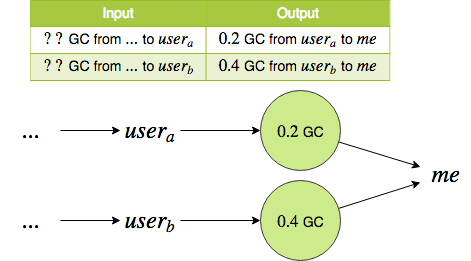

The GC held by the other users are their UTXOs from their previous transactions. The transactions from them to me provide me two UTXOs. These total to the amount of GC I currently hold. These transactions are not however combined ever, but they are their own paths in a tree of past transactions. Let's visualize an expending of a UTXO with another example using the transactions of the above image.

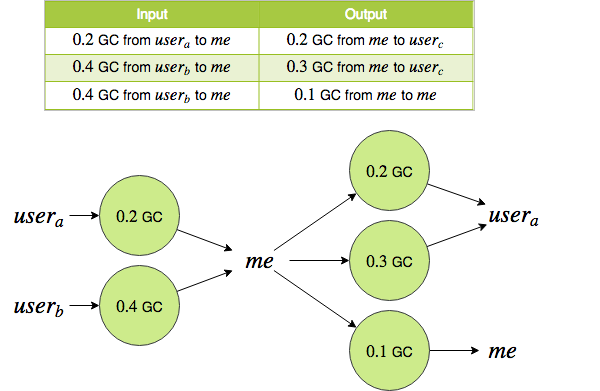

Currency can never be lost in transactions. In the above example we fully expend the 0.2 GC UTXO but use the 0.4 GC UTXO only partially. Because there is effectively no concept of a balance or accounts, the transactions are used and either combined, split or expended fully in the transactions. This is why I had to send 0.1 GC back to me, as it was unspent and thus remains as a UTXO for me to use later. This is also how the transactions build traceable transaction paths.

#### Transaction fees

If the transactions were the only things in the chains, the miners doing the work of solidifying the ledgers with transcations would be forced to work for free. This is where the notion of transaction fees comes in to play. While a fee isn't explicitly defined within a transaction, the fee is added as an extra amount to the input amount. This extra is reserved for the miners to be allocated as fees for them for their efforts. Thus, 

$$\text{transaction fee} = \text{amount}_{in} - \text{amount}_{out}.$$

#### Wallets

While there are no bacnking accounts *per se*, it is possible to construct a sum of current holdings from the transactions performed. The wallets are the software buili to perform just this.

## 2. Building the Cryptocurrency

Next we will create an implementation of our Cryptocurrency named GeneralCoin. We will use the implementation of the blockchain present in the first notebook called *"I. Building a general purpose Blockchain"*. The implementation has been moved to an importable package for saving space from unnecessary repetition of code. We will implement necessary modifications step-by-step to the imported General Purpose Blockchain to transform it to a general purpose Decentralized Cryptocurrency. This will be performed by class inheritance.

### 2.1 Testing the Implementation

We first import the Blockchain and try running the App to see that it functions as intended.

In [1]:
import json
from blockchain.apps import BlockchainApp

with BlockchainApp() as blockchain_app:

    print(blockchain_app.__class__.__name__)

    response = blockchain_app.mine_block()
    print(json.dumps(response.json(), indent=2))

    response = blockchain_app.get_blockchain()
    print(json.dumps(response.json(), indent=2))
    
    response = blockchain_app.validate_blockchain()
    print(json.dumps(response.json(), indent=2))

 * Running on http://localhost:5000/ (Press CTRL+C to quit)


BlockchainApp


127.0.0.1 - - [16/May/2018 09:30:39] "POST /blocks HTTP/1.1" 200 -


{
  "block": {
    "index": 1,
    "previous_hash": "8398175617abaab684804c4efb8769504c1477f42f66d93198607494b9743d99",
    "proof": 533,
    "timestamp": "2018-05-16 09:30:39.236224"
  },
  "message": "Congratulations, you just mined a Block!"
}


127.0.0.1 - - [16/May/2018 09:30:40] "GET /blocks HTTP/1.1" 200 -


{
  "blockchain": [
    {
      "index": 0,
      "previous_hash": "0",
      "proof": 1,
      "timestamp": "2018-05-16 09:30:38.222588"
    },
    {
      "index": 1,
      "previous_hash": "8398175617abaab684804c4efb8769504c1477f42f66d93198607494b9743d99",
      "proof": 533,
      "timestamp": "2018-05-16 09:30:39.236224"
    }
  ],
  "length": 2
}


127.0.0.1 - - [16/May/2018 09:30:41] "GET /blocks/validate HTTP/1.1" 200 -


{
  "message": "Chain is valid.",
  "valid": true
}


127.0.0.1 - - [16/May/2018 09:30:42] "GET /shutdown HTTP/1.1" 200 -


### 2.2 Expanding the Blockchain

Then we import the general purpose Blockchain and begin the required modifications to transform a single chain into a decentralized chain. First thing to change is to add a block-wise container for transactions, which are added to the block only after the block has been mined. We will also have to implement the consensus function for determining which of the competing chains is deemed as the winning one.

In [3]:
import datetime
import hashlib
import json
import requests

from flask import Flask, jsonify, request
from uuid import uuid4
from urllib.parse import urlparse

from blockchain.chains import Blockchain


class GeneralCoin(Blockchain):

    def __init__(self):

        self.chain = []
        self.transactions = []
        self.create_block(proof=1, previous_hash='0')
        self.network = set()

    def create_block(self, proof, previous_hash):
        "Create a block with new transactions."

        block = {
            'index': len(self.chain),
            'timestamp': str(datetime.datetime.now()),
            'proof': proof,
            'previous_hash': previous_hash,
            'transactions': self.transactions
        }
        self.transactions = []
        self.chain.append(block)

        return block

    def add_transaction(self, sender, receiver, amount):
        "Add a transaction to the list of transactions."

        self.transactions.append({'sender': sender,
                                  'receiver': receiver,
                                  'amount': amount})

        return self.get_previous_block()['index'] + 1

    def add_node(self, address):
        "Add a node to the GeneralCoin network."

        parsed_url = urlparse(address)
        self.network.add(parsed_url.netloc)

    def replace_chain(self):
        "Scan the network for longest chain and replace the current accordingly."

        longest_chain = None
        longest_chain_length = len(self.chain)

        for node in self.network:

            response = requests.get(f'http://{node}/blocks')
            
            if not response.status_code == 200:
                
                print(f'Bad response from {node}: {response.status_code}')
                continue
            
            node_chain = response.json()['chain']
            node_chain_length = response.json()['length']
                        
            if node_chain_length > longest_chain_length and self.is_chain_valid(chain):
                
                longest_chain_length = node_chain_length
                longest_chain = node_chain
                
        if longest_chain is not None:
            
            self.chain = longest_chain
            
            return True
        
        return False

## 3. Creating the Web App

Then, as was the case with the general purpose Blockchain, we will continue by creating a Flask based web app that is ran locally in a thread to ensure that the app is runnable from the notebook.